# Convert RGB to grayscale images

In [2]:
from PIL import Image
import glob, os

# for the positive images
positive_dataset_dir = "PATH-TO-YOUR-POSITIVE-IMAGES"
os.chdir(positive_dataset_dir)

for file in glob.glob("*.jpg"):
    img = Image.open(file).convert('LA')
    idx = file.find('.jpg')
    file_name = file[:idx] + '_grayscale.png'
    img.save('PATH-TO-YOUR-GRAYSCALE-POSITIVE-DIRECTORY' + file_name)
    

# for the negative images
negative_dataset_dir = "PATH-TO-YOUR-NEGATIVE-IMAGES"
os.chdir(negative_dataset_dir)

for file in glob.glob("*.jpg"):
    img = Image.open(file).convert('LA')
    idx = file.find('.jpg')
    file_name = file[:idx] + '_grayscale.png'
    img.save('PATH-TO-YOUR-GRAYSCALE-NEGATIVE-DIRECTORY' + file_name)

# Save image from text file to image file 
_if you saved the images as text files and this resulted in higher accuracy_

In [119]:
import glob
import numpy as np
from PIL import Image
import cv2
import datetime

txt_file_names = list(glob.glob("PATH-TO-YOUR-TEXTFILES"))
img_list = []
cnt = 0
for file_name in txt_file_names:
    cnt += 1
    line_list = []
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            sub_line = line.split(',')
            sub_line[-1] = sub_line[-1][:-1]
            line_list.append(sub_line)
        np_arr = np.array(line_list).astype('float32')
        np_arr = (((np_arr - np_arr.min()) / (np_arr.max() - np_arr.min())) * 255.9).astype(np.uint8)
        img = Image.fromarray(np_arr)
        img.save(f"PATH-TO-YOUR-NEW-DIRECTORY\\{cnt}.png")
        
# "D:\\~\\datasets\\new_people_detect\\txt_images\\positive\\filename.png"

# Create train and test dataset

In [21]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dataset directory - replace it with the path on your local
# machine where you have stored the previously labelled dataset.
dataset_dir = "D:\\~\\datasets\\new_people_detect\\txt_images"

# Define the size of the input images. In the case of an
# MLX90640 it will be (24, 32) for horizontal images and
# (32, 24) for vertical images
image_size = (32, 24)

# Image generator batch size
batch_size = 64

# Number of training epochs
epochs = 10

# Instantiate a generator that puts 30% of the images into the validation set
# and normalizes their pixel values between 0 and 1
generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_data = generator.flow_from_directory(dataset_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           subset='training',
                                           class_mode='categorical',
                                           color_mode='grayscale')

test_data = generator.flow_from_directory(dataset_dir,
                                          target_size=image_size,
                                          batch_size=batch_size,
                                          subset='validation',
                                          class_mode='categorical',
                                          color_mode='grayscale')

Found 212 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


# Visualize the classified images

{0: 'negative', 1: 'positive'}


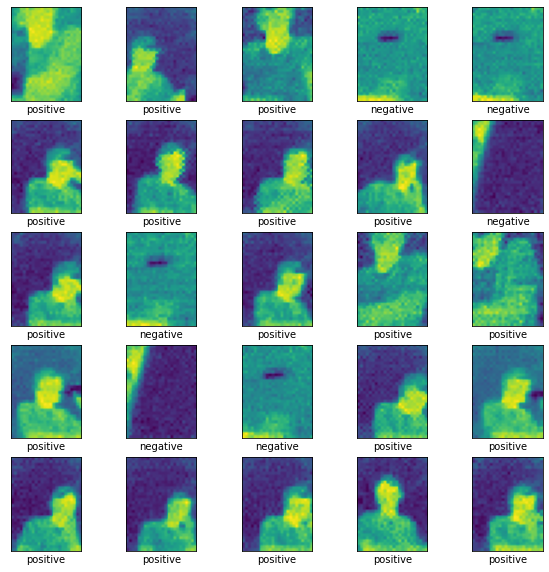

In [22]:
index_to_label = {
  index: label
  for label, index in train_data.class_indices.items()
}

print(index_to_label)

plt.figure(figsize=(10, 10))
batch = train_data.next()

for i in range(min(25, len(batch[0]))):
  img = batch[0][i]

  label = index_to_label[np.argmax(batch[1][i])]
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  # Note the np.squeeze call - matplotlib can't
  # process grayscale images unless the extra
  # 1-sized dimension is removed.
  plt.imshow(np.squeeze(img))
  plt.xlabel(label)

plt.show()

# Train the model

In [23]:
model = keras.Sequential([
  # Layer 1: flatten the input images
  keras.layers.Flatten(input_shape=image_size),
  # Layer 2: fully-connected layer with 80% the neurons as the input images
  # and RELU activation function
  keras.layers.Dense(round(0.8 * image_size[0] * image_size[1]),
                     activation=tf.keras.activations.relu),
  # Layer 2: fully-connected layer with 30% the neurons as the input images
  # and RELU activation function
  keras.layers.Dense(round(0.3 * image_size[0] * image_size[1]),
                     activation=tf.keras.activations.relu),
  # Layer 3: fully-connected layer with as many units as the output labels
  # and Softmax activation function
  keras.layers.Dense(len(train_data.class_indices),
                     activation=tf.nn.softmax)
])

# Compile the model for classification, use the Adam optimizer and pick
# accuracy as optimization metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model in batches
history = model.fit(
  train_data,
  steps_per_epoch=train_data.samples/batch_size,
  validation_data=test_data,
  validation_steps=test_data.samples/batch_size,
  epochs=epochs
)

Epoch 1/10
4/3 [====================================] - 0s 86ms/step - loss: 0.9604 - accuracy: 0.6085 - val_loss: 1.1830 - val_accuracy: 0.3000
Epoch 2/10
4/3 [====================================] - 0s 54ms/step - loss: 0.4108 - accuracy: 0.8302 - val_loss: 0.3723 - val_accuracy: 0.9556
Epoch 3/10
4/3 [====================================] - 0s 49ms/step - loss: 0.1943 - accuracy: 0.9528 - val_loss: 0.3126 - val_accuracy: 0.9444
Epoch 4/10
4/3 [====================================] - 0s 46ms/step - loss: 0.1240 - accuracy: 0.9764 - val_loss: 0.2967 - val_accuracy: 0.9333
Epoch 5/10
4/3 [====================================] - 0s 45ms/step - loss: 0.0892 - accuracy: 0.9811 - val_loss: 0.2248 - val_accuracy: 0.9444
Epoch 6/10
4/3 [====================================] - 0s 52ms/step - loss: 0.0678 - accuracy: 0.9717 - val_loss: 0.4107 - val_accuracy: 0.7667
Epoch 7/10
4/3 [====================================] - 0s 48ms/step - loss: 0.0460 - accuracy: 0.9953 - val_loss: 0.2492 - val_ac

# Visualize the accuracy

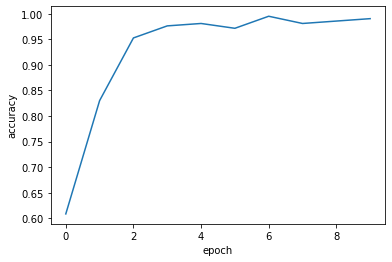

In [24]:
epochs = history.epoch
accuracy = history.history['accuracy']
fig = plt.figure()
plot = fig.add_subplot()
plot.set_xlabel('epoch')
plot.set_ylabel('accuracy')
plot.plot(epochs, accuracy)

# Save the model

In [124]:
def model_save(model, target, labels=None, overwrite=True):
    import json
    import pathlib

    # Check if we should save it like a .h5/.pb file or as a directory
    model_dir = pathlib.Path(target)
    if str(target).endswith('.h5') or str(target).endswith('.pb'):
        model_dir = model_dir.parent

    # Create the model directory if it doesn't exist
    # pathlib.Path(model_dir).mkdir(parents=True, exist_ok=True)

    # Save the Tensorflow model using the .save method
    model.save(target, overwrite=overwrite)

    # Save the label names of your model in a separate JSON file
    if labels:
        labels_file = os.path.join(model_dir, 'labels.json')
        with open(labels_file, 'w') as f:
            f.write(json.dumps(list(labels)))

model_dir = "MODEL-PATH"
model_save(model, model_dir,
           labels=train_data.class_indices.keys(), overwrite=True)

INFO:tensorflow:Assets written to: D:\~\models\new_people_detect_grayscale\assets


In [60]:
new_model = tf.keras.models.load_model('MODEL-PATH')

img = np.reshape(img, (1,24,32,1))
new_model.predict(img)

array([[1., 0.]], dtype=float32)